# ***Importing Packages***

In [ ]:
import pandas as pd 
import numpy as np
import sklearn.preprocessing as preprocessing
import sklearn.model_selection as model_selection
import matplotlib.pyplot as plt
import seaborn as sns

# ***Reading races.csv file***

In [ ]:
races = pd.read_csv('/content/races.csv')
races.head(4)

,race_id,date,venue,race_no,config,surface,distance,going,horse_ratings,prize,...,place_combination3,place_combination4,place_dividend1,place_dividend2,place_dividend3,place_dividend4,win_combination1,win_dividend1,win_combination2,win_dividend2
0,0,1997-06-02,ST,1,A,0,1400,GOOD TO FIRM,40-15,485000.0,...,6.0,NaN,36.5,25.5,18.0,NaN,8,121.0,NaN,NaN
1,1,1997-06-02,ST,2,A,0,1200,GOOD TO FIRM,40-15,485000.0,...,4.0,NaN,12.5,47.0,33.5,NaN,5,23.5,NaN,NaN
2,2,1997-06-02,ST,3,A,0,1400,GOOD TO FIRM,60-40,625000.0,...,13.0,NaN,23.0,23.0,59.5,NaN,11,70.0,NaN,NaN
3,3,1997-06-02,ST,4,A,0,1200,GOOD TO FIRM,120-95,1750000.0,...,10.0,NaN,14.0,24.5,16.0,NaN,5,52.0,NaN,NaN


In [ ]:
races_data = races[['race_id' ,  'venue' , 'surface' , 'distance' , 'race_class' , 'going']]
races_data.head(4)

,race_id,venue,surface,distance,race_class,going
0,0,ST,0,1400,5,GOOD TO FIRM
1,1,ST,0,1200,5,GOOD TO FIRM
2,2,ST,0,1400,4,GOOD TO FIRM
3,3,ST,0,1200,1,GOOD TO FIRM


In [ ]:
races_data.shape

(6349, 6)

# ***Reading runs.csv file***

In [ ]:
runs = pd.read_csv('/content/runs.csv')
runs.head(4)

,race_id,horse_no,horse_id,result,won,lengths_behind,horse_age,horse_country,horse_type,horse_rating,...,time2,time3,time4,time5,time6,finish_time,win_odds,place_odds,trainer_id,jockey_id
0,0,1,3917,10,0.0,8.00,3,AUS,Gelding,60,...,21.59,23.86,24.62,NaN,NaN,83.92,9.7,3.7,118.0,2.0
1,0,2,2157,8,0.0,5.75,3,NZ,Gelding,60,...,21.99,23.30,23.70,NaN,NaN,83.56,16.0,4.9,164.0,57.0
2,0,3,858,7,0.0,4.75,3,NZ,Gelding,60,...,21.59,23.90,24.22,NaN,NaN,83.40,3.5,1.5,137.0,18.0
3,0,4,1853,9,0.0,6.25,3,SAF,Gelding,60,...,21.83,23.70,24.00,NaN,NaN,83.62,39.0,11.0,80.0,59.0


In [ ]:
runs_data = runs[['race_id' , 'horse_age' , 'declared_weight' , 'win_odds' , 'draw' , 'won']]
runs_data.head(4)

,race_id,horse_age,declared_weight,win_odds,draw,won
0,0,3,1020.0,9.7,7,0.0
1,0,3,980.0,16.0,12,0.0
2,0,3,1082.0,3.5,8,0.0
3,0,3,1118.0,39.0,13,0.0


In [ ]:
runs_data.shape

(39473, 6)

# ***Merging 2 dataframes***

In [ ]:
df = pd.merge( races_data , runs_data)
df.head(14)

,race_id,venue,surface,distance,race_class,going,horse_age,declared_weight,win_odds,draw,won
0,0,ST,0,1400,5,GOOD TO FIRM,3,1020.0,9.7,7,0.0
1,0,ST,0,1400,5,GOOD TO FIRM,3,980.0,16.0,12,0.0
2,0,ST,0,1400,5,GOOD TO FIRM,3,1082.0,3.5,8,0.0
3,0,ST,0,1400,5,GOOD TO FIRM,3,1118.0,39.0,13,0.0
4,0,ST,0,1400,5,GOOD TO FIRM,3,972.0,50.0,14,0.0
5,0,ST,0,1400,5,GOOD TO FIRM,3,1114.0,7.0,5,0.0
6,0,ST,0,1400,5,GOOD TO FIRM,3,978.0,99.0,11,0.0
7,0,ST,0,1400,5,GOOD TO FIRM,3,1170.0,12.0,2,1.0
8,0,ST,0,1400,5,GOOD TO FIRM,3,1126.0,38.0,6,0.0
9,0,ST,0,1400,5,GOOD TO FIRM,3,1072.0,39.0,9,0.0


In [ ]:
df.shape

(39473, 11)

# ***Encoding***

In [ ]:
df.isnull().sum()

race_id            0
venue              0
surface            0
distance           0
race_class         0
going              0
horse_age          0
declared_weight    0
win_odds           0
draw               0
won                0
dtype: int64

Encoding for venue 

1 ::>> ST 

0::>> HV

In [ ]:
venue_encoder = preprocessing.LabelEncoder()
df['venue'] = venue_encoder.fit_transform(df['venue'])
df.head(14)

,race_id,venue,surface,distance,race_class,going,horse_age,declared_weight,win_odds,draw,won
0,0,1,0,1400,5,GOOD TO FIRM,3,1020.0,9.7,7,0.0
1,0,1,0,1400,5,GOOD TO FIRM,3,980.0,16.0,12,0.0
2,0,1,0,1400,5,GOOD TO FIRM,3,1082.0,3.5,8,0.0
3,0,1,0,1400,5,GOOD TO FIRM,3,1118.0,39.0,13,0.0
4,0,1,0,1400,5,GOOD TO FIRM,3,972.0,50.0,14,0.0
5,0,1,0,1400,5,GOOD TO FIRM,3,1114.0,7.0,5,0.0
6,0,1,0,1400,5,GOOD TO FIRM,3,978.0,99.0,11,0.0
7,0,1,0,1400,5,GOOD TO FIRM,3,1170.0,12.0,2,1.0
8,0,1,0,1400,5,GOOD TO FIRM,3,1126.0,38.0,6,0.0
9,0,1,0,1400,5,GOOD TO FIRM,3,1072.0,39.0,9,0.0


In [ ]:
df.venue

0        1
1        1
2        1
3        1
4        1
        ..
39468    1
39469    1
39470    1
39471    1
39472    1
Name: venue, Length: 39473, dtype: int64

Encoding for going

array(['GOOD TO FIRM', 'GOOD', 'GOOD TO YIELDING', 'WET SLOW', 'FAST',
       'YIELDING', 'YIELDING TO SOFT', 'SOFT', 'WET FAST', 'SLOW'],

array([2., 1., 3., 7., 0., 8., 9., 5., 6., 4.])

In [ ]:
len(pd.unique(df['going']))

10

In [ ]:
df['going'].unique()
#array([2., 1., 3., 7., 0., 8., 9., 5., 6., 4.])

array(['GOOD TO FIRM', 'GOOD', 'GOOD TO YIELDING', 'WET SLOW', 'FAST',
       'YIELDING', 'YIELDING TO SOFT', 'SOFT', 'WET FAST', 'SLOW'],
      dtype=object)

In [ ]:
going_encoder = preprocessing.OrdinalEncoder()
df['going'] = going_encoder.fit_transform(df['going'].values.reshape(-1, 1))
df.head(14)

,race_id,venue,surface,distance,race_class,going,horse_age,declared_weight,win_odds,draw,won
0,0,1,0,1400,5,2.0,3,1020.0,9.7,7,0.0
1,0,1,0,1400,5,2.0,3,980.0,16.0,12,0.0
2,0,1,0,1400,5,2.0,3,1082.0,3.5,8,0.0
3,0,1,0,1400,5,2.0,3,1118.0,39.0,13,0.0
4,0,1,0,1400,5,2.0,3,972.0,50.0,14,0.0
5,0,1,0,1400,5,2.0,3,1114.0,7.0,5,0.0
6,0,1,0,1400,5,2.0,3,978.0,99.0,11,0.0
7,0,1,0,1400,5,2.0,3,1170.0,12.0,2,1.0
8,0,1,0,1400,5,2.0,3,1126.0,38.0,6,0.0
9,0,1,0,1400,5,2.0,3,1072.0,39.0,9,0.0


In [ ]:
df['going'].unique()

array([2., 1., 3., 7., 0., 8., 9., 5., 6., 4.])

# ***Final dataframe***

In [ ]:
df = df.drop('race_id' , axis='columns')
df.head(14)

,venue,surface,distance,race_class,going,horse_age,declared_weight,win_odds,draw,won
0,1,0,1400,5,2.0,3,1020.0,9.7,7,0.0
1,1,0,1400,5,2.0,3,980.0,16.0,12,0.0
2,1,0,1400,5,2.0,3,1082.0,3.5,8,0.0
3,1,0,1400,5,2.0,3,1118.0,39.0,13,0.0
4,1,0,1400,5,2.0,3,972.0,50.0,14,0.0
5,1,0,1400,5,2.0,3,1114.0,7.0,5,0.0
6,1,0,1400,5,2.0,3,978.0,99.0,11,0.0
7,1,0,1400,5,2.0,3,1170.0,12.0,2,1.0
8,1,0,1400,5,2.0,3,1126.0,38.0,6,0.0
9,1,0,1400,5,2.0,3,1072.0,39.0,9,0.0


In [ ]:
df.shape

(39473, 10)

# ***Statistics***

In [ ]:
attributes = ['venue' , 'surface' , 'distance' , 'race_class' , 'going' , 'horse_age' , 'declared_weight' , 'win_odds' , 'draw' ]

Winners = round(df[df['won']==1][attributes].describe(),2)
Not_Winners = round(df[df['won']==0][attributes].describe(),2)

pd.concat([Winners, Not_Winners], axis='columns', keys=['Winners', 'Not Winners'])

Winners                                                                 \
         venue surface distance race_class    going horse_age declared_weight   
count  3159.00  3159.0  3159.00    3159.00  3159.00   3159.00         3159.00   
mean      0.62     0.1  1424.36       3.84     1.52      3.01         1108.83   
std       0.48     0.3   282.15       2.01     1.24      0.17           63.21   
min       0.00     0.0  1000.00       0.00     0.00      2.00          906.00   
25%       0.00     0.0  1200.00       3.00     1.00      3.00         1065.00   
50%       1.00     0.0  1400.00       4.00     1.00      3.00         1106.00   
75%       1.00     0.0  1650.00       4.00     2.00      3.00         1149.00   
max       1.00     1.0  2400.00      13.00     9.00      5.00         1349.00   

                        Not Winners                                          \
      win_odds     draw       venue  surface  distance race_class     going   
count  3159.00  3159.00    36314.00  36314.0  36314.00   36314.00  36314.00   
mean      9.57     6.18        0.65      0.1   1424.19       3.83      1.52   
std      11.60     3.70        0.48      0.3    276.92       1.94      1.25   
min       1.00     1.00        0.00      0.0   1000.00       0.00      0.00   
25%       3.60     3.00        0.00      0.0   1200.00       3.00      1.00   
50%       6.10     6.00        1.00      0.0   1400.00       4.00      1.00   
75%      10.00     9.00        1.00      0.0   1650.00       4.00      2.00   
max      99.00    14.00        1.00      1.0   2400.00      13.00      9.00   

                                                     
      horse_age declared_weight  win_odds      draw  
count  36314.00        36314.00  36314.00  36314.00  
mean       3.01         1102.21     28.97      6.93  
std        0.16           63.41     29.14      3.74  
min        2.00          693.00      1.20      1.00  
25%        3.00         1059.00      8.50      4.00  
50%        3.00         1099.00     16.00      7.00  
75%        3.00         1143.00     38.00     10.00  
max        6.00         1369.00     99.00     14.00

# ***Visualisation***

Text(0.5, 1.0, 'Number of Labels by Class')

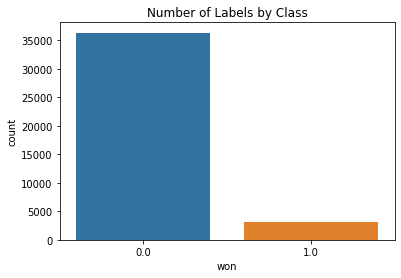

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='won')
plt.title('Number of Labels by Class')

# ***Input dataframe : X***

In [ ]:
X = df.drop(['won'] , axis='columns')
X.head(14)

,venue,surface,distance,race_class,going,horse_age,declared_weight,win_odds,draw
0,1,0,1400,5,2.0,3,1020.0,9.7,7
1,1,0,1400,5,2.0,3,980.0,16.0,12
2,1,0,1400,5,2.0,3,1082.0,3.5,8
3,1,0,1400,5,2.0,3,1118.0,39.0,13
4,1,0,1400,5,2.0,3,972.0,50.0,14
5,1,0,1400,5,2.0,3,1114.0,7.0,5
6,1,0,1400,5,2.0,3,978.0,99.0,11
7,1,0,1400,5,2.0,3,1170.0,12.0,2
8,1,0,1400,5,2.0,3,1126.0,38.0,6
9,1,0,1400,5,2.0,3,1072.0,39.0,9


# ***Output dataframe : y***

In [ ]:
y = df['won']
y.head(14)

0     0.0
1     0.0
2     0.0
3     0.0
4     0.0
5     0.0
6     0.0
7     1.0
8     0.0
9     0.0
10    0.0
11    0.0
12    0.0
13    0.0
Name: won, dtype: float64

# ***train_test_split***

In [ ]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(X , y , test_size=0.2 )

In [ ]:
len(X_train)

31578

In [ ]:
len(X_test)

7895

In [ ]:
df['won'].value_counts()

0.0    36314
1.0     3159
Name: won, dtype: int64

# ***Dummy Classifier***

In [ ]:
from sklearn.dummy import DummyClassifier

In [ ]:
model_dummy = DummyClassifier()
model_dummy.fit(X_train, y_train)

DummyClassifier()

In [ ]:
model_dummy.score(X_test , y_test)

0.9196960101329955

In [ ]:
dummy_pred = model_dummy.predict(X_test)
dummy_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,dummy_pred  )

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7261
         1.0       0.00      0.00      0.00       634

    accuracy                           0.92      7895
   macro avg       0.46      0.50      0.48      7895
weighted avg       0.85      0.92      0.88      7895



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***Logistic Regression***

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_logistic = LogisticRegression()
model_logistic.fit(X_train, y_train)

LogisticRegression()

In [ ]:
model_logistic.score(X_test , y_test)

0.9196960101329955

In [ ]:
logistic_pred = model_logistic.predict(X_test)
logistic_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(classification_report(y_test,logistic_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7261
         1.0       0.00      0.00      0.00       634

    accuracy                           0.92      7895
   macro avg       0.46      0.50      0.48      7895
weighted avg       0.85      0.92      0.88      7895



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***Decision Tree***

In [ ]:
from sklearn import tree

In [ ]:
model_decision = tree.DecisionTreeClassifier()
model_decision.fit(X_train , y_train)

DecisionTreeClassifier()

In [ ]:
model_decision.score(X_test , y_test)

0.8568714376187461

In [ ]:
decision_pred = model_decision.predict(X_test)
decision_pred

array([0., 0., 1., ..., 0., 0., 0.])

In [ ]:
print(classification_report(y_test,decision_pred))

              precision    recall  f1-score   support

         0.0       0.93      0.92      0.92      7261
         1.0       0.16      0.19      0.17       634

    accuracy                           0.86      7895
   macro avg       0.54      0.55      0.55      7895
weighted avg       0.87      0.86      0.86      7895



# ***Random Forest***

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model_random = RandomForestClassifier()
model_random.fit(X_train, y_train)

RandomForestClassifier()

In [ ]:
model_random.score(X_test , y_test)

0.9167827739075364

In [ ]:
random_pred = model_random.predict(X_test)
random_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(classification_report(y_test,random_pred))

              precision    recall  f1-score   support

         0.0       0.92      0.99      0.96      7261
         1.0       0.32      0.03      0.06       634

    accuracy                           0.92      7895
   macro avg       0.62      0.51      0.51      7895
weighted avg       0.87      0.92      0.88      7895



# ***Support Vector Machine***

In [ ]:
from sklearn.svm import SVC

In [ ]:
model_svm = SVC()
model_svm.fit(X_train, y_train)

SVC()

In [ ]:
model_svm.score(X_test , y_test)

0.9196960101329955

In [ ]:
svm_pred = model_svm.predict(X_test)
svm_pred

array([0., 0., 0., ..., 0., 0., 0.])

In [ ]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96      7261
         1.0       0.00      0.00      0.00       634

    accuracy                           0.92      7895
   macro avg       0.46      0.50      0.48      7895
weighted avg       0.85      0.92      0.88      7895



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# ***Confusion Matrix***

In [ ]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, random_pred)
cm

array([[7217,   44],
       [ 613,   21]])

Text(33.0, 0.5, 'Truth')

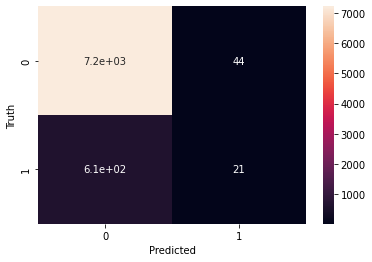

In [ ]:
%matplotlib inline 
import matplotlib.pyplot as plt
import seaborn as sn
plt.figure(figsize=(6,4))
sn.heatmap(cm, annot = True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

# ***Prediction***

In [ ]:
model_random.predict([['1' , '1' , '1750' , '12' , '4' , '5' , '1250' , '7.5' , '7' ]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([0.])

In [ ]:
model_random.predict([['1' , '0' , '1400' , '5' , '2.0' , '3' , '1170.0' , '12.0' , '2' ]])

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"


array([1.])